In [103]:
# Densidad de corriente
"""
Created on Fri Nov 19 10:10:47 2021

@author: Javier
"""

import numpy as np
import scipy.integrate
import scipy.special
import scipy
import matplotlib.pyplot as plt

#%%
bobth=[3.015e-3, 5.46e-3, 2.94e-3, 900, 1.32e-3, 6.03e-3]

args=[1e3,bobth,16.5e6,1,1000]

bo=args[1]

I=0.01
#%%
def cquad(func, a, b, **kwargs):
    """ funcion auxiliar"""
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = scipy.integrate.quad(real_func, a, b, **kwargs)
    imag_integral = scipy.integrate.quad(imag_func, a, b, **kwargs)
    return (real_integral[0] + 1j*imag_integral[0])

#%%
def ji(k,r1,r2):
    """ funcion auxiliar"""
    return scipy.integrate.quad(lambda x: x*scipy.special.jv(1,x) ,k*r1,k*r2)[0]

#%%
def expz(k,z1,z2):
    """ funcion auxiliar"""
    return ((np.exp(-k*z1)-np.exp(-k*z2)))/(k**(3))

#%%
def sigj(k,sigma,f,mur,z):
    """ funcion auxiliar"""
    mu0 = 4*np.pi*1e-7
    k2=1j*2*np.pi*f*mu0*mur*sigma
    la=np.sqrt(k**2+k2)
    return (2*k*mur*np.exp(la*z)/(la+k*mur))

#%%
def jhf(r, z, I, args):
    """ Calculo de densidad corriente sobre una placa semi-infinita """

    f=args[0]
    bo=args[1]
    sigma=args[2]
    mur=args[3]
    lmax=args[4]
    # jhf=list()
    mu0=4*np.pi*1e-7;
    r1=bo[0];
    r2=bo[1];
    dh=bo[2];
    N=bo[3];
    z1=bo[4];
    l0=bo[5]
    i0=N*I/((r2-r1)*dh)
    aint=1j*2*np.pi*f*sigma*mu0*i0
    inte=cquad(lambda k: scipy.special.j1(k*r)*ji(k,r1,r2)*expz(k,z1,z1+dh)*sigj(k,sigma,f,mur,z),0,lmax)
    return(aint*inte)

In [55]:
rv=np.linspace(0.1e-3,10e-3,100)
z=0

In [27]:
jtita=[]
for r in rv:
    jtita.append(np.real(jhf(r,z,0.01,args)))

/var/folders/r5/drfy1ddj6kn6vmxs9_7hw4_r0000gn/T/ipykernel_17158/888185876.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  imag_integral = scipy.integrate.quad(imag_func, a, b, **kwargs)
/var/folders/r5/drfy1ddj6kn6vmxs9_7hw4_r0000gn/T/ipykernel_17158/888185876.py:27: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  real_integral = scipy.integrate.quad(real_func, a, b, **kwargs)


$ \hat{\theta} = −r sin(\theta)\hat{x}+rcos(\theta)\hat{y}$

In [263]:
xv=np.linspace(-10e-3,10e-3,20)
yv=np.linspace(-10e-3,10e-3,20)
xmesh, ymesh = np.meshgrid(xv, yv) # xmesh y ymesh son dos matrices de len(x)*len(y)



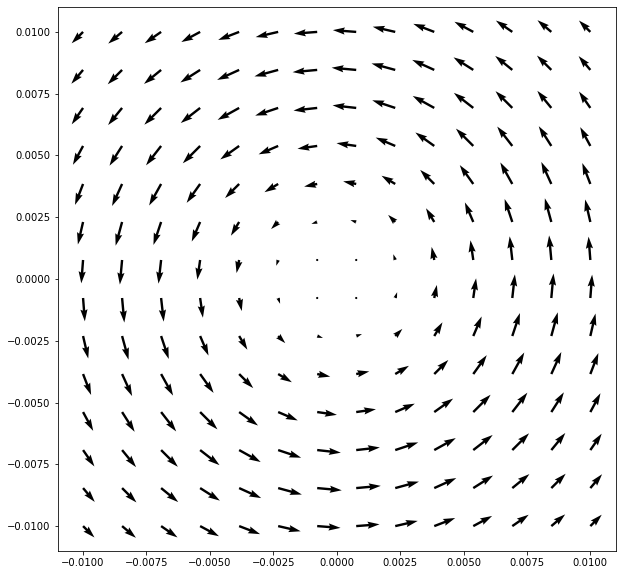

In [275]:
xv=np.linspace(-10e-3,10e-3,14)
yv=np.linspace(-10e-3,10e-3,14)
xmesh, ymesh = np.meshgrid(xv, yv) # xmesh y ymesh son dos matrices de len(x)*len(y)


z=0

jx=np.zeros((len(xv),len(yv)))
jy=np.zeros((len(xv),len(yv)))
theta=np.zeros((len(xv),len(yv)))

for i,x in enumerate(xv):
    for j,y in enumerate(yv):
        r=np.sqrt(x**2+y**2)
        tita=np.arctan(y/x)
        if x < 0 :            
            jtita=-np.real(jhf(r,z,I,args))
        else:
            jtita=np.real(jhf(r,z,I,args))
        theta[j,i]=tita
        jx[j,i]=-r*np.sin(tita)*jtita
        jy[j,i]=r*np.cos(tita)*jtita

plt.figure(figsize=(10,10))

plt.quiver(xmesh, ymesh,jx,jy,scale=1000, scale_units='inches') # Dibuja la malla donde va a graficar el vector

plt.show()  

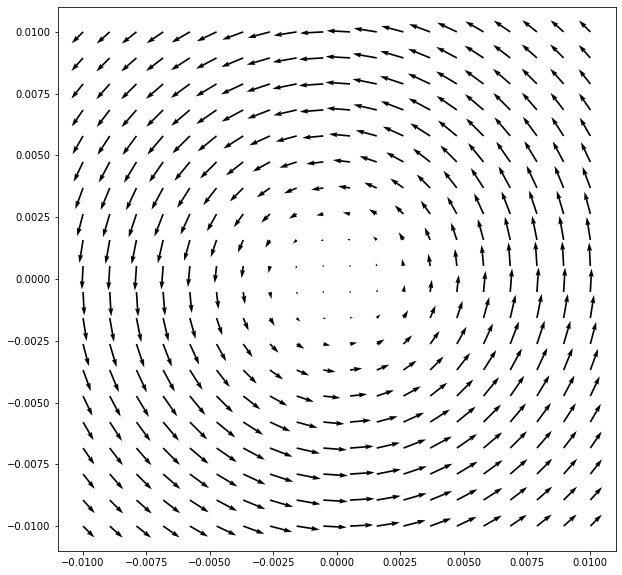

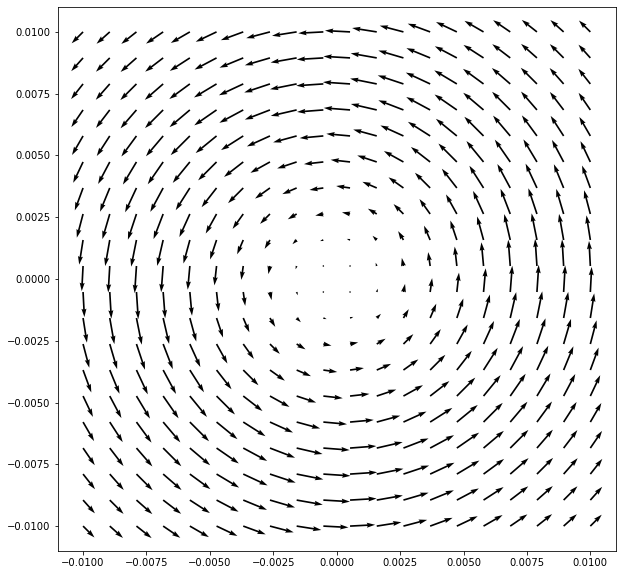

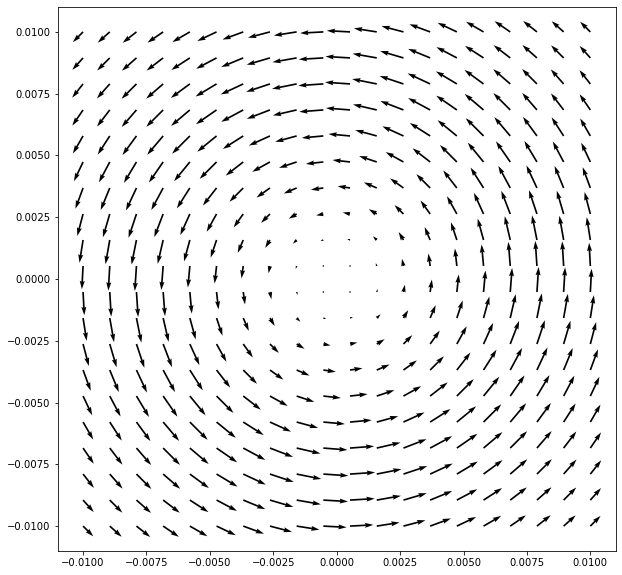

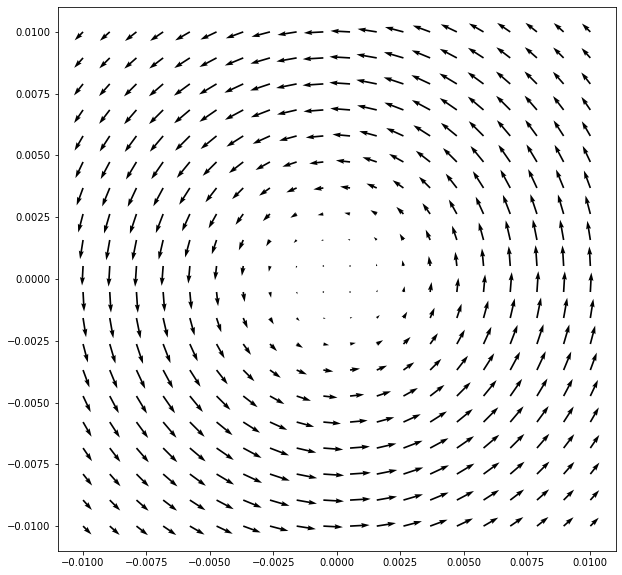

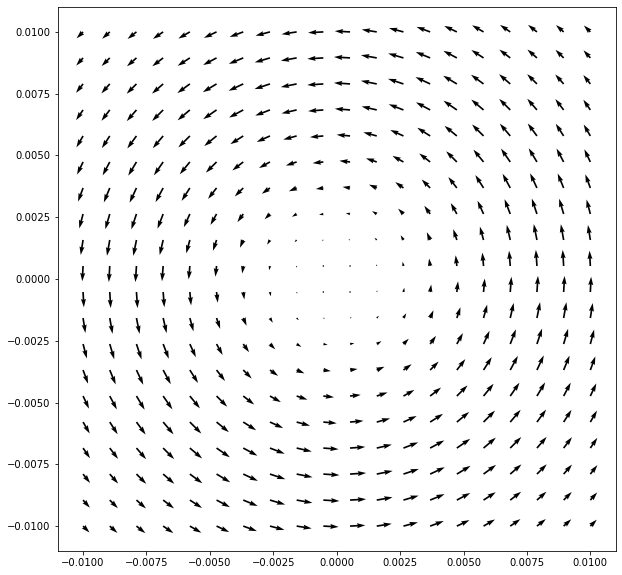

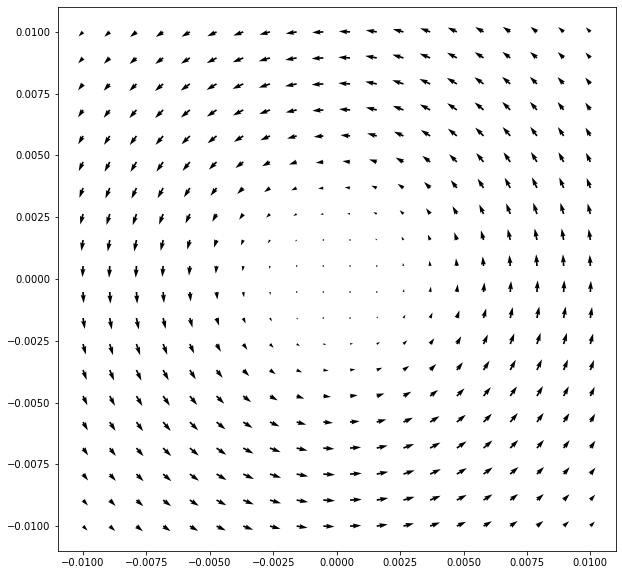

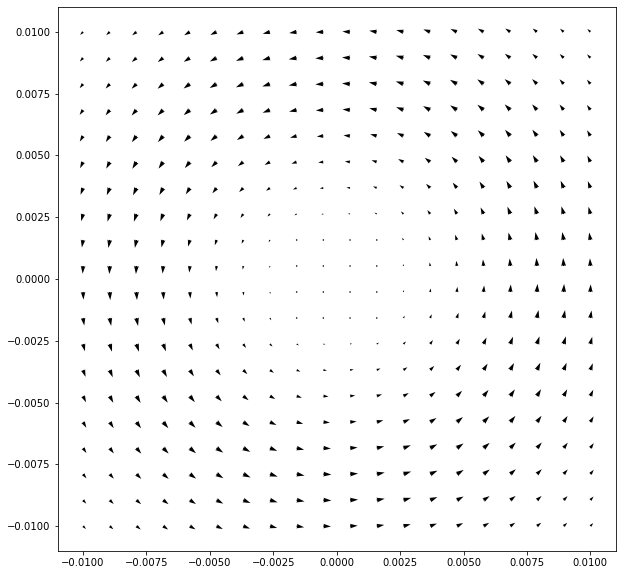

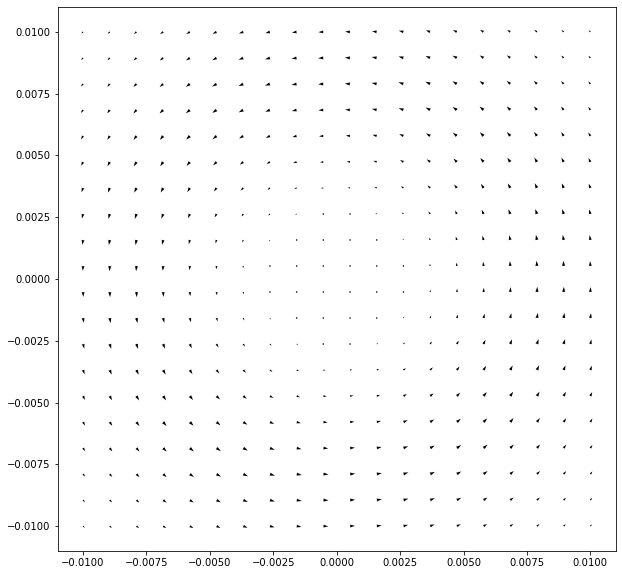

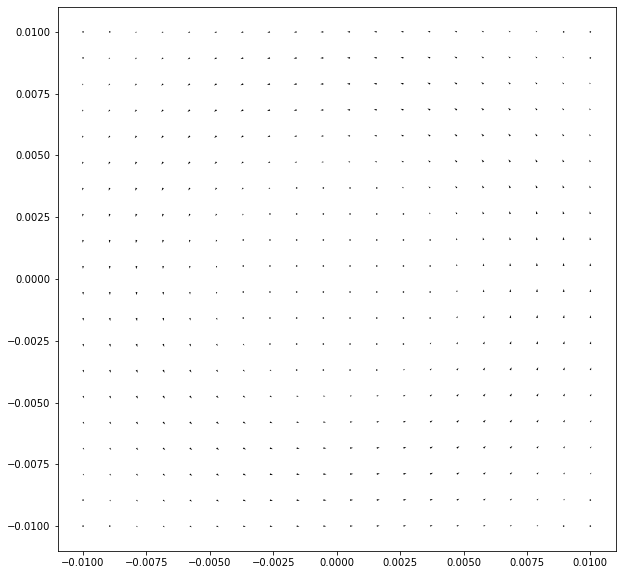

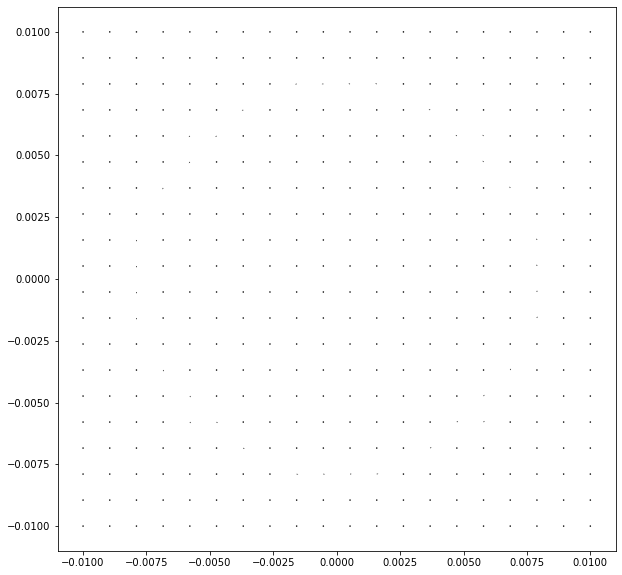

In [273]:
xv=np.linspace(-10e-3,10e-3,14)
yv=np.linspace(-10e-3,10e-3,14)
xmesh, ymesh = np.meshgrid(xv, yv) # xmesh y ymesh son dos matrices de len(x)*len(y)
zv=np.linspace(0,-10e-3,10)

for z in zv:
    jx=np.zeros((len(xv),len(yv)))
    jy=np.zeros((len(xv),len(yv)))
    theta=np.zeros((len(xv),len(yv)))

    for i,x in enumerate(xv):
        for j,y in enumerate(yv):
            r=np.sqrt(x**2+y**2)
            tita=np.arctan(y/x)
            if x < 0 :            
                jtita=-np.real(jhf(r,z,I,args))
            else:
                jtita=np.real(jhf(r,z,I,args))
            theta[j,i]=tita
            jx[j,i]=-r*np.sin(tita)*jtita
            jy[j,i]=r*np.cos(tita)*jtita
        
    plt.figure(figsize=(10,10))

    plt.quiver(xmesh, ymesh,jx,jy,scale=1000, scale_units='inches') # Dibuja la malla donde va a graficar el vector

    plt.show()        

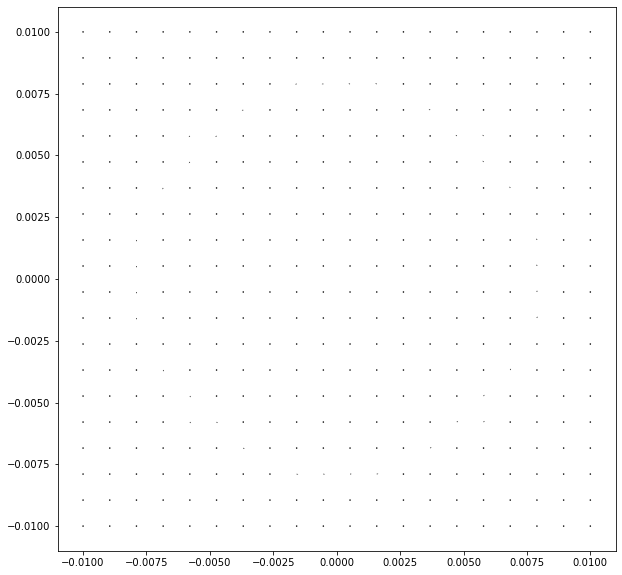

In [270]:

plt.figure(figsize=(10,10))

plt.quiver(xmesh, ymesh,jx,jy,scale=1000, scale_units='inches') # Dibuja la malla donde va a graficar el vector

plt.show()

In [164]:
xt=np.linspace(0,0.1,10)
yt=-np.ones(10)

T=np.ones([len(xt), len(yt)])

for i,x in enumerate(xt): # Son las filas de las matrices Jr, Jrx y Jry
    
    T[i,:]=T[i,:]*i

In [165]:
T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])

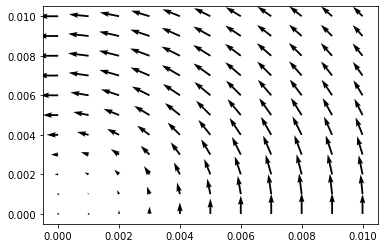

In [130]:
#%% Cálculo los vectores para graficar la dendidad de corriente en el primer
#   cuadrante

x = np.arange(0, 11e-3, 1e-3)
y = np.arange(0, 11e-3, 1e-3)



# Para graficar la corriente tengo que formar las matrices umesh y vmesh de 
# dimensión len(x)*len(y); que son las componentes de J

# uu, vv = np.meshgrid(np.sqrt(x**2+y**2), y**2) 

Jr = np.zeros([len(x), len(y)])

Jrx = np.zeros([len(x), len(y)])
Jry = np.zeros([len(x), len(y)])

for i,a in enumerate(x): # Son las filas de las matrices Jr, Jrx y Jry
    for j,b in enumerate(y): # Son la columnas de las matrices Jr, Jrx y Jry
        r = np.sqrt(a**2+b**2)
        
        
        # r,z,I, args
        jr = np.real(jhf(r,0.0,0.01,args))
        
        Jr[j,i] = jr
        
        if a != 0:
            t = np.arctan(b/a)
        else:
            t = np.pi / 2

# $ \hat{\theta} = −r sin(\theta)\hat{x}+rcos(\theta)\hat{y}$
        Jrx[j,i] = -jr * np.sin(t)*r
        Jry[j,i] = jr * np.cos(t)*r

#%% Grafica la dendidad de corriente en el primer cuadrante

xmesh, ymesh = np.meshgrid(x, y) 

plt.quiver(xmesh, ymesh, Jrx, Jry)       

plt.show()
    

In [6]:
#%% Prolongolos ejes

xv = np.arange(-0.01, 0.01, 0.0005)
yv = np.arange(-0.01, 0.01, 0.0005)

lx = len(xv)
ly = len(yv)

xs = np.zeros(lx)
ys = np.zeros(lx)



Jt = np.zeros([len(xv), len(yv)])

Jx = np.zeros([len(xv), len(yv)])
Jy = np.zeros([len(xv), len(yv)])

for i,x in enumerate(xv): # Son las filas de las matrices Jr, Jrx y Jry
    for j,y in enumerate(yv): # Son la columnas de las matrices Jr, Jrx y Jry
        
        r = np.sqrt(x**2+y**2)
        
        # r,z,I, args
        jt = np.real(jhf(r,0.0,0.01,args))
               
        Jt[i,j] = jt
        
        # if a != 0:
        #    jt = np.arctan(b/a)
        # else:
        #    jt = np.pi / 2
        
        t=np.arctan(y/x)
        
        Jx[i,j] = -np.sin(t)*jt
        Jy[i,j] = np.cos(t)*jt


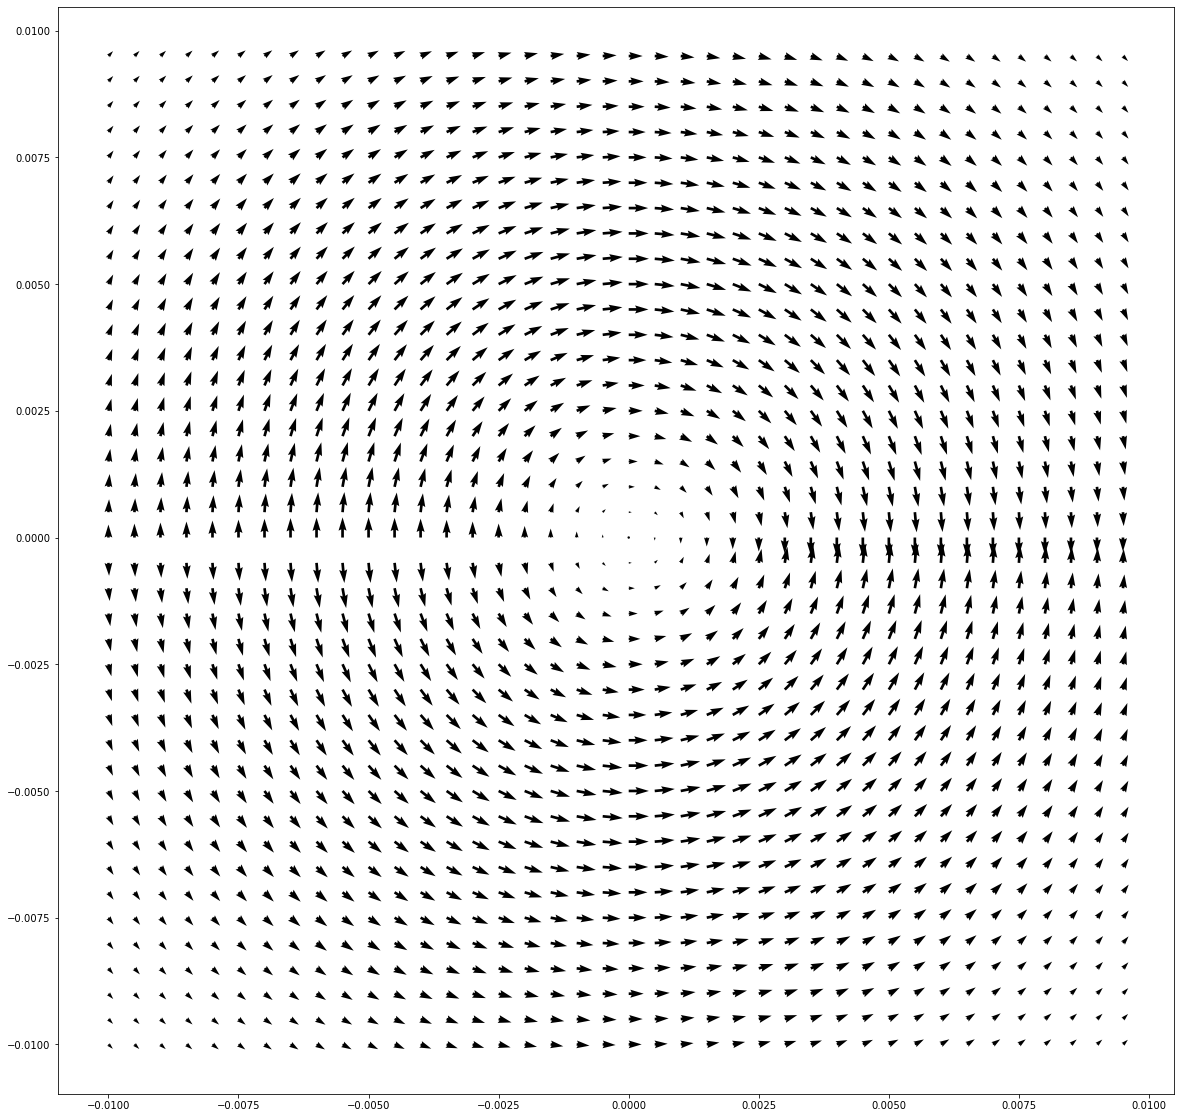

In [7]:
xmesh, ymesh = np.meshgrid(xv, yv) 

plt.figure(figsize=[20,20])

plt.quiver(xmesh, ymesh, Jy, Jx)       

plt.show()
    

In [8]:
#%% Prolongo por simetría los ejes



x = np.arange(0.0001, 0.011, 0.001)
y = np.arange(0.0001, 0.011, 0.001)

lx = len(x)
ly = len(y)

xs = np.zeros(2*lx-1)
ys = np.zeros(2*lx-1)




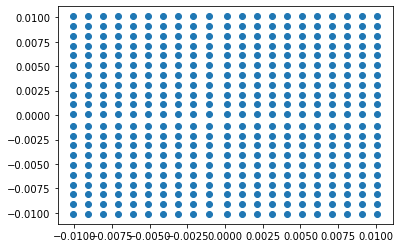

In [9]:
for i,a in enumerate(x):
    xs[i+lx-1] = x[i]
    if i > 0:
        xs[-i+lx-1] = -x[i]

for j,a in enumerate(y):
    ys[j+ly-1] = y[j]
    if j > 0:
        ys[-j+ly-1] = -y[j]

#%%
xmeshs, ymeshs = np.meshgrid(xs, ys) 

plt.scatter(xmeshs, ymeshs)
plt.show()

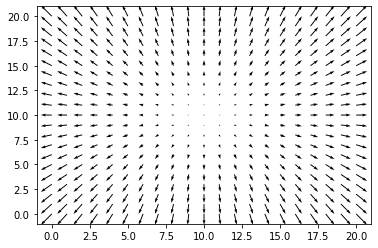

In [10]:


plt.quiver(xmeshs, ymeshs) # quiver: quick vector
# umesh y vmesh son dos matrices de len(x)*len(y)

plt.show()